In [125]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from math import radians, sin, cos, asin, sqrt
import seaborn as sns
from haversine import haversine


Correspondance code INSEE (postal) - coordonnées géographiques

In [126]:
communes = pd.read_csv("./communes-france-2022.csv")


/var/folders/j6/rmtqpjm53hg_prjc1kd43mmm0000gn/T/ipykernel_1045/690497630.py:1: DtypeWarning: Columns (1,12,14,16,23) have mixed types. Specify dtype option on import or set low_memory=False.
  communes = pd.read_csv("./communes-france-2022.csv")


In [3]:
#print(communes.columns)

In [127]:
insee = communes['code_insee']
# Extraction des vecteurs
lat = communes["latitude_mairie"].values
lon = communes["longitude_mairie"].values

# en radian
lat_r , long_r = lat*2*np.pi/360 , long*2*np.pi/360

#N = len(insee)
# on prends les 393 premières communes (AIN)
N = 1000
insee_s , lat_s, long_s = insee[:N], lat[:N], long[:N]


Distance entre communes

In [70]:

def haversine_vec(lat1, lon1, lat2, lon2, R=6371000.0):
    # lat/ lon already in radians; inputs can be arrays broadcastable
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c


In [ ]:

# ---- charge tes coordonnées ----
comm = pd.read_csv("villes.csv")  # colonnes: ville, lat, lon
# Extraction des vecteurs
lat = no.radian(comm["latitude_mairie"].values)
lon = np.radian(comm["longitude_mairie"].values)

n = len(lat)

# ---- memmap pour la matrice résultat (float32) ----
out_fname = "distances_30k.dat"
dist_mm = np.memmap(out_fname, dtype="float32", mode="w+", shape=(n, n))

# ---- paramètres de bloc ----
block = 1000  # ajuster selon RAM (500..2000)
for i in range(0, n, block):
    i2 = min(n, i + block)
    lat_i = lat[i:i2][:, None]   # shape (bi,1)
    lon_i = lon[i:i2][:, None]
    # broadcast avec tout le vecteur colonne (1, n)
    lat_all = lat[None, :]       # shape (1,n)
    lon_all = lon[None, :]
    # calcule bloc (bi, n)
    d_block = haversine_vec(lat_i, lon_i, lat_all, lon_all)
    dist_mm[i:i2, :] = d_block.astype("float32")
    # si tu veux ne remplir que la triangle supérieure, tu peux appliquer un masque
    print(f"computed rows {i}..{i2-1}")

# sync disque
dist_mm.flush()

In [15]:

# Création des grilles (broadcasting)
lat1, lat2 = np.meshgrid(lat, lat)
lon1, lon2 = np.meshgrid(lon, lon)

# Matrice des distances (en mètres)
distance_matrix = haversine(lat1, lon1, lat2, lon2)

KeyboardInterrupt: 

In [10]:
d= haversine(lat[0],long[0],lat[1],long[1])
print(long[0],long[1])
print(d)
print(6371000*sqrt((long_r[0]-long_r[1])**2 + (lat_r[0]-lat_r[1])**2))

4.926 5.428
32107.25141649016
58071.01149619695


Matrice de distance entre communes dij= distance entre communes i et j

In [25]:
for i in range(N)

D = np.array([[haversine(lat_s[i],long_s[i],lat_s[j],long_s[j]) for j in range(N)] for i in range(N)])*1e-3 #en km

Création d'un graphe à partir de la distance , deterrence function = soft RGG

In [128]:
dist = np.load("distances1.npy", mmap_mode="r")*1e-3
print(dist.shape, dist[0,1])


(35010, 35010) 41.89913


In [37]:

nodes = list(insee)
threshold = 20 # on choisit 10 km
edges=[]
for i in range(len(insee)):
    if i==1000:
        print(i)
    for j in range(i+1,len(insee)):
        if dist[i][j]<threshold:
            edges.append((insee[i],insee[j]))


1000


In [38]:
g = nx.Graph()


In [39]:

nodes = np.array(insee)
for i in range(len(insee)):
    g.add_node(nodes[i],latitude=lat[i],
        longitude=long[i])

g.add_edges_from(edges)


In [40]:
nx.write_graphml(g, "dist_thr20.graphml")

{'01001': Text(0.9671332210079332, 0.27836274147235573, '01001'),
 '01002': Text(0.9412442949246316, 0.3173408461712186, '01002'),
 '01004': Text(0.9541159241356089, 0.32137645754949373, '01004'),
 '01005': Text(0.9783994958856906, 0.2838063004057156, '01005'),
 '01006': Text(0.9587895095891907, 0.3534551818951386, '01006'),
 '01007': Text(0.9486241877365801, 0.311450601196786, '01007'),
 '01008': Text(0.9435995955477623, 0.30882238237462456, '01008'),
 '01009': Text(0.9468854880283473, 0.35470332729217185, '01009'),
 '01010': Text(0.9175664950783552, 0.35408515190166623, '01010'),
 '01011': Text(0.9071747620816532, 0.31788818080931946, '01011'),
 '01012': Text(0.9311575706458138, 0.320580112570872, '01012'),
 '01013': Text(0.9459998786581095, 0.33475470720031636, '01013'),
 '01014': Text(0.8969796403159412, 0.3077870481883847, '01014'),
 '01015': Text(0.9593690001410013, 0.36394655466034503, '01015'),
 '01016': Text(0.9376136551846987, 0.23417737391916885, '01016'),
 '01017': Text(0.9

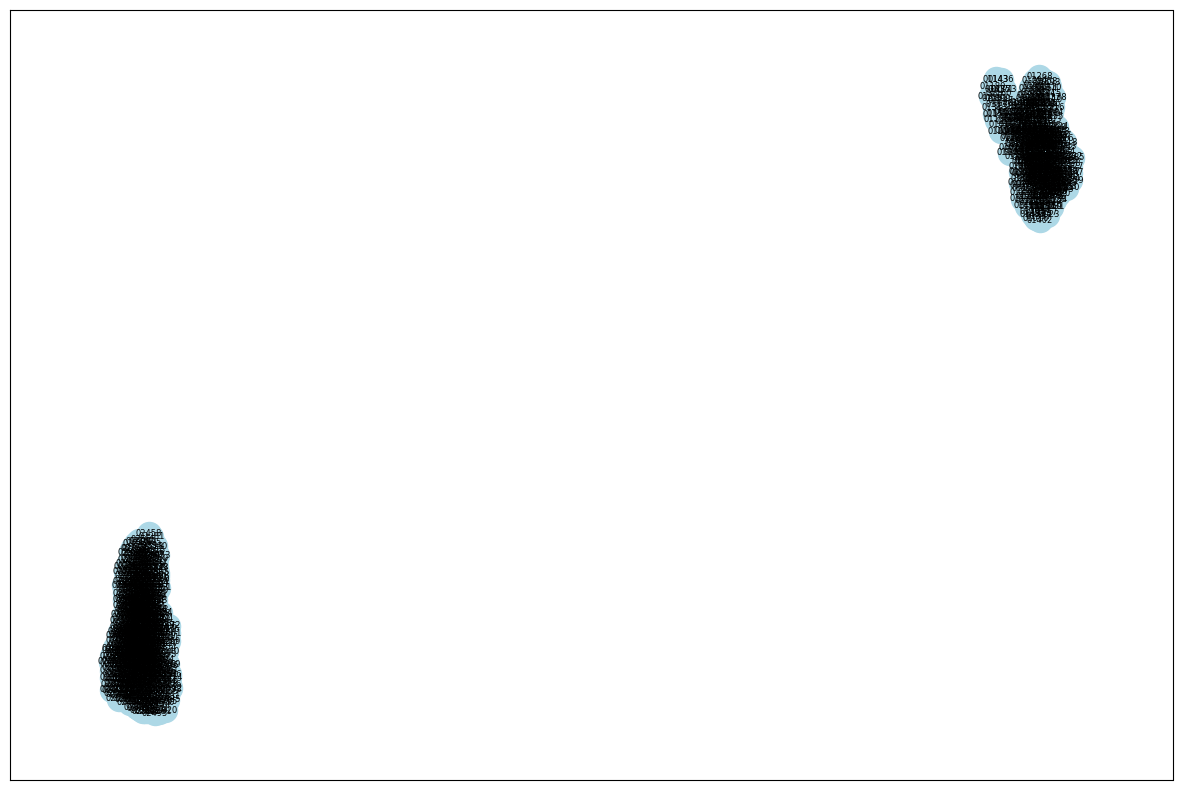

In [65]:
#Visualizing

plt.figure(figsize=(15,10))

pos = nx.spring_layout(g, seed=20, scale=1)

nx.draw_networkx_nodes(g, pos, node_color='lightblue', node_size=300)
nx.draw_networkx_edges(g, pos, edge_color='gray', width=1, alpha=0.7)
nx.draw_networkx_labels(g, pos, font_size=6)


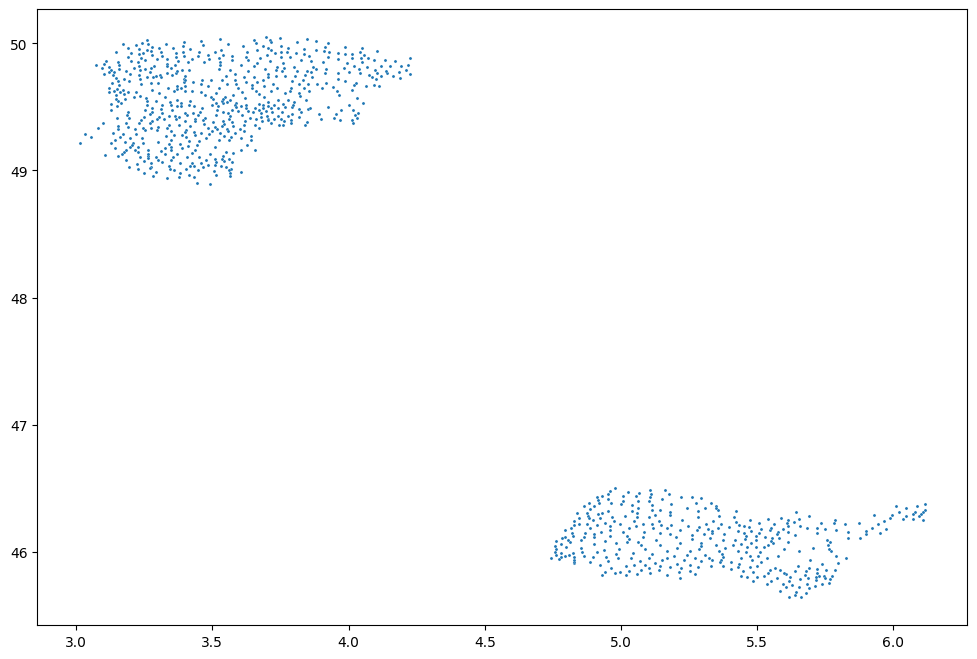

In [57]:
x= list(nx.get_node_attributes(g,"lon").values())
y= list(nx.get_node_attributes(g,"lat").values())

plt.figure(figsize=(12,8))
plot = sns.scatterplot(x=long_s,y=lat_s,s=5)


(array([ 16.,  16.,  78., 156., 172., 168., 115., 108., 100.,  71.]),
 array([ 62. , 106.4, 150.8, 195.2, 239.6, 284. , 328.4, 372.8, 417.2,
        461.6, 506. ]),
 <BarContainer object of 10 artists>)

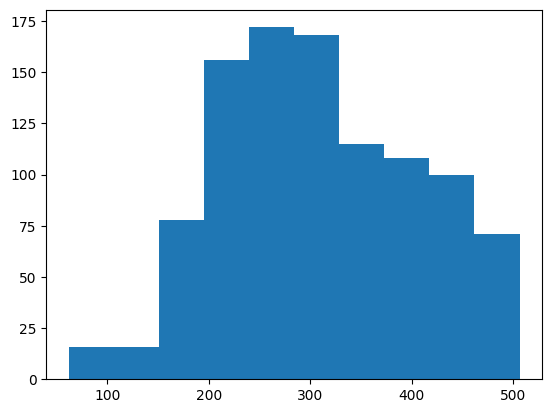

In [66]:
# Expected degree graph
degree= g.degree
lst= list(degree)
degree_arr= np.zeros(len(lst))

for i in range(len(lst)):
    degree_arr[i] = lst[i][1]
plt.hist(degree_arr)

POPULATION 2022


In [73]:
popul =communes["population"].values


Création d'un graph spatial suivant une loi gravitaire avec multiplication par population
pij propto (Pi * Pj)/Dij**2


In [135]:
# on commence avec l'ain 
N = 393
lat_s = lat[:N]
long_s = long[:N]
pop_s = popul[:N]
insee_s = insee[:N]

D = np.array([[haversine_vec(lat_s[i],long_s[i],lat_s[j],long_s[j]) for j in range(N)] for i in range(N)])*1e-3 #en km
mat = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if i==j:
            mat[i][j]=0
        else: 
            mat[i][j] = pop_s[i]*pop_s[j]/(D[i][j])**2
            #mat[i][j] = 1/D[i][j]**2
            

In [156]:
"""h = nx.Graph()
nodes = list(insee_s)



edges=[]
for i in range(N):
    
    for j in range(i+1,N):
        if mat[i][j]>1e-6:
            edges.append((insee[i],insee[j]))"""

In [145]:
h = nx.Graph()
nodes = list(insee_s)



A_rand = np.random.uniform(0,1,(N,N))
edges=[]
for i in range(N):
    
    for j in range(i+1,N):
        if mat[i][j]/10>A_rand[i][j]:
            edges.append((insee[i],insee[j]))

In [157]:
nodes = np.array(insee_s)
for i in range(N):
    h.add_node(nodes[i],latitude=lat[i],
        longitude=long[i])

h.add_edges_from(edges)


{'01001': Text(-0.1489075262999849, 0.2906808782104996, '01001'),
 '01002': Text(-0.030939436105841, -0.1402518729939189, '01002'),
 '01004': Text(-0.12108643474516463, -0.16917007257420552, '01004'),
 '01005': Text(-0.25437042443878866, 0.05023834114257713, '01005'),
 '01006': Text(-0.3308298333517328, -0.37891442650610657, '01006'),
 '01007': Text(-0.05912206671876137, -0.11895036661733324, '01007'),
 '01008': Text(-0.16453686936816997, -0.17103840246854352, '01008'),
 '01009': Text(-0.2840991807295466, -0.37210043733816317, '01009'),
 '01010': Text(-0.12639958958108263, -0.3645433166353182, '01010'),
 '01011': Text(0.3426330295833788, -0.13984842342665255, '01011'),
 '01012': Text(-0.007266797634681289, -0.18847898902407234, '01012'),
 '01013': Text(-0.17891317046159702, -0.26895880461582605, '01013'),
 '01014': Text(0.44440221138828484, -0.12827387653125544, '01014'),
 '01015': Text(-0.3339145149597432, -0.43085327044331834, '01015'),
 '01016': Text(0.03320668341109348, 0.754751829

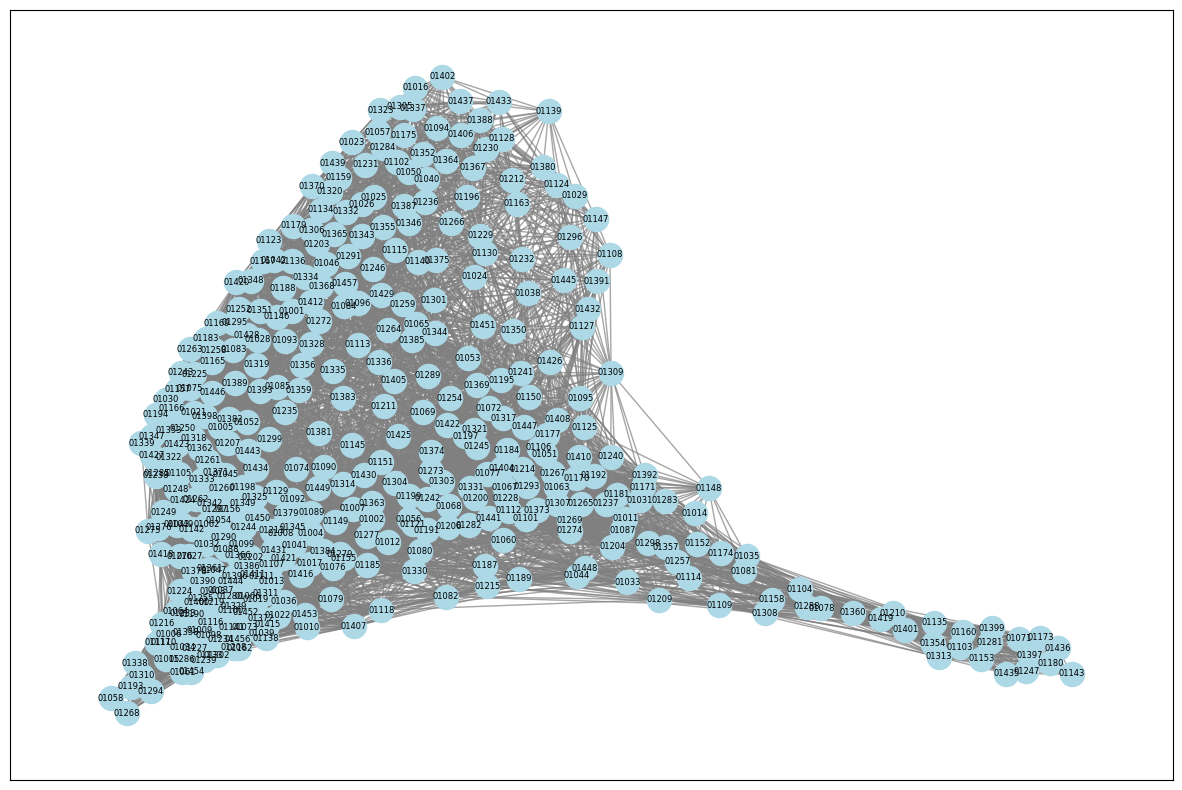

In [158]:
#Visualizing

plt.figure(figsize=(15,10))

pos = nx.spring_layout(h, seed=20, scale=1)

nx.draw_networkx_nodes(h, pos, node_color='lightblue', node_size=300)
nx.draw_networkx_edges(h, pos, edge_color='gray', width=1, alpha=0.7)
nx.draw_networkx_labels(h, pos, font_size=6)

In [161]:
nx.write_graphml(h, "grav_nopop_1e6.graphml")